# **Histogtam Based Image Segmentation Using Python (skimage, scipy)**
---

## **Overview**
This notebook demonstrates histogram-based image segmentation by dividing an image into segments based on intensity values. It first denoises a noisy image using the Non-local Means (NLM) algorithm and then segments the denoised image into four different regions using intensity thresholds. The segments are further refined using binary opening and closing to eliminate noise and enhance the clarity of the segmented regions.

## **Installing PyWavelets**
- PyWavelets is installed to support advanced image processing functions, though not directly used in this notebook. It provides wavelet transformations for noise reduction and image analysis.

In [25]:
# !pip install PyWavelets

## **1. Importing Required Libraries**
- The necessary libraries are imported to handle image loading (`io`), denoising (`denoise_nl_means`, `estimate_sigma`), and morphological operations (`scipy.ndimage`). matplotlib is used for displaying images and histograms, while numpy is used for array operations.

In [23]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte, io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd

## **2. Loading and Displaying the Noisy Image**
- The noisy image is loaded using `io.imread()` and converted to a floating-point format using `img_as_float()`, which is required for further processing. The image is then displayed using `plt.imshow()`.



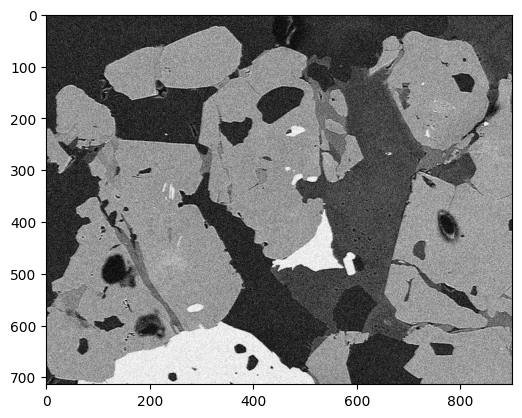

In [6]:
img = img_as_float(io.imread("/content/Noisy Image.jpg"))
plt.imshow(img, cmap="gray");

## **3. Denoising the Image Using Non-local Means**
- Non-local Means (NLM) denoising is applied to the image. The noise standard deviation (`sigma_est`) is estimated, which is used to configure the NLM filter to reduce noise while preserving important details.
- The denoised image is converted to an unsigned 8-bit integer format (`img_as_ubyte()`) for easier handling in subsequent steps.

## **Parameters & Variations**:
- `h=1.15 * sigma_est`: Controls the amount of filtering based on the estimated noise. Higher values of h provide stronger noise reduction.
- `patch_size`, `patch_distance`: Define the size of the patches for comparison and the search radius for finding similar patches.

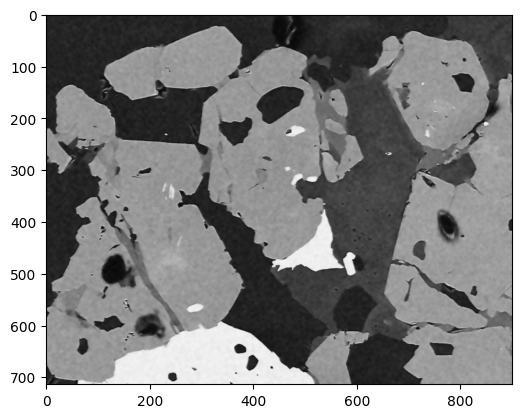

In [15]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
denoise = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, channel_axis=None)
denoise = img_as_ubyte(denoise)
plt.imshow(denoise, cmap="gray");

## **4. Histogram Plotting**
- A histogram of the denoised image's pixel intensities is plotted using `plt.hist()`. The pixel intensity values are binned into 100 ranges, providing insight into how the intensities are distributed, which is crucial for segmentation.

**Parameters & Variations**:
- `bins`: Specifies the number of bins for the histogram.
- `range=(0, 255)`: Limits the intensity values considered, as the image is in 8-bit format (0–255).

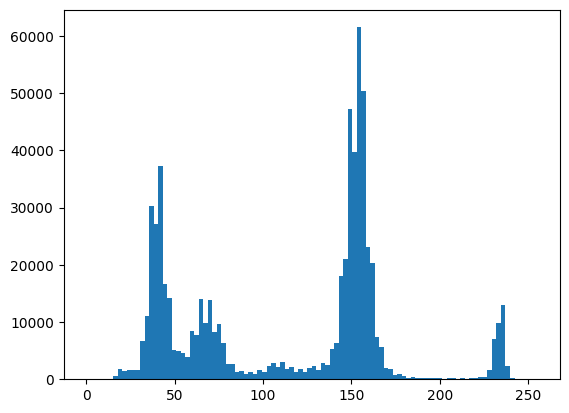

In [17]:
plt.hist(denoise.flat, bins=100, range=(0, 255));

## **5. Segmenting the Image Based on Intensity**
- The denoised image is segmented into four regions based on intensity values:
  - `segment1`: Pixels with intensity ≤ 55 (darker region).
  - `segment2`: Pixels with intensity between 55 and 110.
  - `segment3`: Pixels with intensity between 110 and 210.
  - `segment4`: Pixels with intensity > 210 (brightest region).

**Parameters & Variations**:
- The intensity thresholds (55, 110, 210) can be adjusted based on the histogram to better capture the regions of interest.

In [19]:
segment1 = (denoise <= 55)
segment2 = (denoise > 55) & (denoise <= 110)
segment3 = (denoise > 100) & (denoise <= 210)
segment4 = (denoise > 210)

## **6. Visualizing the Segmented Regions**
- A color-coded representation of the segmented image is created using `all_segments`. Each segment is assigned a different color:
- Red (1, 0, 0) for `segment1`.
- Green (0, 1, 0) for `segment2`.
- Blue (0, 0, 1) for `segment3`.
- Yellow (1, 1, 0) for `segment4`.

**Parameters & Variations**:
- The colors used for the segments can be customized.

In [20]:
all_segments = np.zeros((denoise.shape[0], denoise.shape[1], 3))

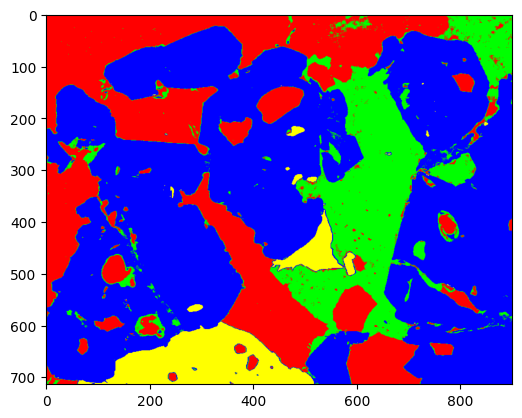

In [22]:
all_segments[segment1] = (1, 0, 0)
all_segments[segment2] = (0, 1, 0)
all_segments[segment3] = (0, 0, 1)
all_segments[segment4] = (1, 1, 0)
plt.imshow(all_segments);

## **7. Morphological Operations on Segments (Opening and Closing) and Visualization**
- Binary opening and closing are performed on each segment to remove small noise and fill in gaps within the segments.
  - Opening: Removes small objects from the background.
  - Closing: Fills small holes within objects.
- After the morphological operations, the cleaned segments are visualized in color. Each cleaned segment retains the color scheme from the earlier visualization, showing a clearer version of the segmented image.

**Parameters & Variations**:
- The structuring element used for both operations is a `3x3` matrix of ones (`np.ones((3, 3))`). This can be modified to use larger or differently shaped structuring elements for stronger effects.

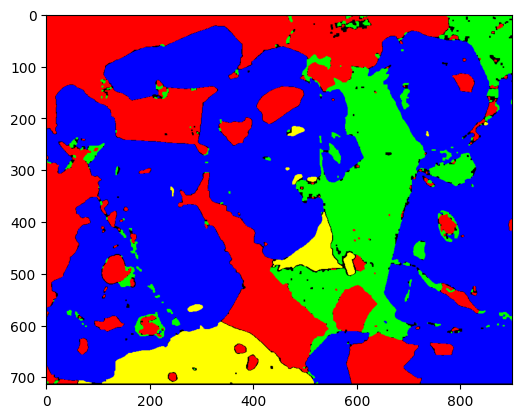

In [24]:
segment1_opened = nd.binary_opening(segment1, np.ones((3, 3)))
segment1_closed = nd.binary_closing(segment1_opened, np.ones((3, 3)))

segment2_opened = nd.binary_opening(segment2, np.ones((3, 3)))
segment2_closed = nd.binary_closing(segment2_opened, np.ones((3, 3)))

segment3_opened = nd.binary_opening(segment3, np.ones((3, 3)))
segment3_closed = nd.binary_closing(segment3_opened, np.ones((3, 3)))

segment4_opened = nd.binary_opening(segment4, np.ones((3, 3)))
segment4_closed = nd.binary_closing(segment4_opened, np.ones((3, 3)))

all_segments_cleaned = np.zeros((denoise.shape[0], denoise.shape[1], 3))

all_segments_cleaned[segment1_closed] = (1, 0, 0)
all_segments_cleaned[segment2_closed] = (0, 1, 0)
all_segments_cleaned[segment3_closed] = (0, 0, 1)
all_segments_cleaned[segment4_closed] = (1, 1, 0)

plt.imshow(all_segments_cleaned);